# Pandas Introduction 
Pandas is a Python library for data analysis with functionality for data exploration, cleaning and transformations. Built upon numpy and scipy, provides data structures and data manipulation functions with integrated indexing. Core features include: combining large data sets, visualizations, descriptive statistics, and data-wrangling capabilities.

The 2 main data structure are Series and DataFrames. 
A series is one 1-dimensional array-like data structure similar to ndarray, but supports many data types.

A dataframe is a 2-dimensional data structure for heterogeneous data with labeled axis for rows and columns and arithmetic operations that work on both row and column labels. It can be viewed as a container for series objects, where each row is a series.

Characteristics of dataframes:
 * Each column can have a label name (i.e. header) and can contain a different type of data from its other columns
 * By default, each row has an index within a range of values beginning at [0]. However, the row index can also be set as labels (e.g. a location name, date).
 * All cells have both a row and a column index (i.e. 2-dimensional)
 * Cell selectiion done via indexing (e.g. cell at row 1, column 1) or query by specific values, such as specific text strings or numeric values).
 * Work with cell by selecting based on index or queried values:
     * across an entire row
     * across an entire column (or series, a 1-dimensional array)
 * pandas dataframes also allow cells to have null values (i.e. no data value such as blank space, NaN, -999, etc).  

Pandas API Doc: https://pandas.pydata.org/docs/reference/index.html#api

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Pandas Series  
Pandas Series is one-dimensional labeled array.

In [2]:
# create a series with default index
ser = pd.Series(data=[100, 200, 300, 400, 500])
ser

0    100
1    200
2    300
3    400
4    500
dtype: int64

In [3]:
# series with custom index
ser = pd.Series(data=[100, 200, 300, 400, 500], index=['jan', 'feb', 'mar', 'apr', 'may'])
ser

jan    100
feb    200
mar    300
apr    400
may    500
dtype: int64

In [4]:
ser.index

Index(['jan', 'feb', 'mar', 'apr', 'may'], dtype='object')

In [5]:
ser['mar']

300

In [6]:
# return subset by index (starting at 0)
ser[[4, 3, 1]]

may    500
apr    400
feb    200
dtype: int64

In [7]:
'apr' in ser

True

In [8]:
ser * 2  # multiple each value by 2

jan     200
feb     400
mar     600
apr     800
may    1000
dtype: int64

In [9]:
ser ** 2 # square each value

jan     10000
feb     40000
mar     90000
apr    160000
may    250000
dtype: int64

## Pandas DataFrame  
2-dimensional labeled data structure.  
Pandas dataframes are composed of rows and columns that can have header names. The columns in pandas dataframes can be different types (e.g. the first column containing integers and the second column containing text strings). Each value in pandas dataframe is referred to as a cell that has a specific row index and column index.

In [10]:
# function DataFrame used to manually define a pandas dataframe

hours_worked = pd.DataFrame(columns=["day_of_week", "hours"],
                             data=[
                                    ["Mon", 40],  ["Tues", 20],
                                    ["Wed", 30],  ["Thurs", 0.0],
                                    ["Friday", 45]
                            ])


hours_worked

,day_of_week,hours
0,Mon,40.0
1,Tues,20.0
2,Wed,30.0
3,Thurs,0.0
4,Friday,45.0


In [11]:
# summary statistics
hours_worked.describe()

,hours
count,5.000000
mean,27.000000
std,17.888544
min,0.000000
25%,20.000000
50%,30.000000
75%,40.000000
max,45.000000


## reading and writing to csv

In [12]:
# writing to csv
hours_worked.to_csv('hoursworked.csv', index = False)

# reading from csv into a dataframe
df = pd.read_csv('hoursworked.csv', delimiter=',')
df

,day_of_week,hours
0,Mon,40.0
1,Tues,20.0
2,Wed,30.0
3,Thurs,0.0
4,Friday,45.0


### Creating dataframes

In [13]:
# Create DataFrame from dictionary of series
s1 = pd.Series([100, 200, 300])
s2 = pd.Series([111, 222, 333, 4444])

d = {'first' : s1,
     'second' : s2}

df = pd.DataFrame(d)
print(df)

   first  second
0  100.0     111
1  200.0     222
2  300.0     333
3    NaN    4444


In [14]:
# Create DataFrame from dictionary of series with index

d = {'first' : pd.Series([100, 200, 300], index=['Bill', 'Jane', 'Sue']),
     'second' : pd.Series([111, 222, 333, 4444], index=['Bill', 'Jane', 'Cerill', 'Dancy'])}

df = pd.DataFrame(d)
print(df)

        first  second
Bill    100.0   111.0
Cerill    NaN   333.0
Dancy     NaN  4444.0
Jane    200.0   222.0
Sue     300.0     NaN


In [15]:
# data frame index
df.index

Index(['Bill', 'Cerill', 'Dancy', 'Jane', 'Sue'], dtype='object')

In [16]:
# data frame columns
df.columns

Index(['first', 'second'], dtype='object')

In [17]:
# create a data frame from dictionary by specific index 
pd.DataFrame(d, index=['Dancy', 'Bill', 'Jane'])

,first,second
Dancy,NaN,4444
Bill,100.0,111
Jane,200.0,222


In [18]:
# creating a data frame from dictionary by specific index and specify column names
pd.DataFrame(d, index=['Dancy', 'Bill', 'Jane'], columns=['second', 'five'])

,second,five
Dancy,4444,NaN
Bill,111,NaN
Jane,222,NaN


In [19]:
# Create DataFrame from list of dictionaries
data = [{'Alex': 1, 'Joe': 2}, {'Emma': 5, 'Dora': 10, 'Alice': 20}]

pd.DataFrame(data)

,Alex,Joe,Emma,Dora,Alice
0,1.0,2.0,NaN,NaN,NaN
1,NaN,NaN,5.0,10.0,20.0


In [20]:
# Create DataFrame from list of dictionaries, specifying the index names
pd.DataFrame(data, index=['orange', 'red'])

,Alex,Joe,Emma,Dora,Alice
orange,1.0,2.0,NaN,NaN,NaN
red,NaN,NaN,5.0,10.0,20.0


In [21]:
# Create DataFrame from list of dictionaries by specific columns
pd.DataFrame(data, columns=['Joe', 'Dora','Alice'])

,Joe,Dora,Alice
0,2.0,NaN,NaN
1,NaN,10.0,20.0


## Basic DataFrame operations

In [22]:
d = {'first' : pd.Series([100, 200, 300], index=['Bill', 'Jane', 'Sue']),
     'second' : pd.Series([111, 222, 333, 4444], index=['Bill', 'Jane', 'Cerill', 'Dancy'])}

df = pd.DataFrame(d)
df

,first,second
Bill,100.0,111.0
Cerill,NaN,333.0
Dancy,NaN,4444.0
Jane,200.0,222.0
Sue,300.0,NaN


**ways to select elements:**
 * Location-based Indexing using .iloc providing the row and column indexes as ranges
 * Location-based Indexing using .loc providing the row and column labels as ranges
 * Label-based Indexing via column label

In [23]:
# select first row and first column
df.iloc[0:1, 0:1]

,first
Bill,100.0


In [24]:
# Select first two rows and first column
df.iloc[0:2, 0:1]

,first
Bill,100.0
Cerill,NaN


In [25]:
# Select first row with all columns
df.iloc[0:1, :]

,first,second
Bill,100.0,111.0


In [26]:
# first column with all rows
df.iloc[:, 0:1]

,first
Bill,100.0
Cerill,NaN
Dancy,NaN
Jane,200.0
Sue,300.0


In [27]:
# select a single column by column names. Returns a series object
df.loc[ : , 'first' ]

Bill      100.0
Cerill      NaN
Dancy       NaN
Jane      200.0
Sue       300.0
Name: first, dtype: float64

In [28]:
# get values by column name
df['first']

Bill      100.0
Cerill      NaN
Dancy       NaN
Jane      200.0
Sue       300.0
Name: first, dtype: float64

In [29]:
# get values by column name and return a new dataframe, using inner []
df[['first']]

,first
Bill,100.0
Cerill,NaN
Dancy,NaN
Jane,200.0
Sue,300.0


In [30]:
# add a third column populated with the product of first and second
df['third'] = df['first'] * df['second']
df

,first,second,third
Bill,100.0,111.0,11100.0
Cerill,NaN,333.0,NaN
Dancy,NaN,4444.0,NaN
Jane,200.0,222.0,44400.0
Sue,300.0,NaN,NaN


In [31]:
# add a boolean flag column 
df['flag'] = df['first'] > 250
df

,first,second,third,flag
Bill,100.0,111.0,11100.0,False
Cerill,NaN,333.0,NaN,False
Dancy,NaN,4444.0,NaN,False
Jane,200.0,222.0,44400.0,False
Sue,300.0,NaN,NaN,True


In [32]:
# select multiple columns and return a new dataframe using ,loc
df2 = df.loc[ : , ['first', 'second'] ]
df2

,first,second
Bill,100.0,111.0
Cerill,NaN,333.0
Dancy,NaN,4444.0
Jane,200.0,222.0
Sue,300.0,NaN


In [33]:
# select multiple columns and return a new dataframe using column names
df2 = df[['first', 'second']]
df2

,first,second
Bill,100.0,111.0
Cerill,NaN,333.0
Dancy,NaN,4444.0
Jane,200.0,222.0
Sue,300.0,NaN


In [34]:
# Select a single row by Index Label
df.loc[ 'Bill' , : ]

first       100.0
second      111.0
third     11100.0
flag        False
Name: Bill, dtype: object

In [35]:
# multiple rows by Index Label as a dataframe
df.loc[ ['Bill' , 'Jane'] , : ]

,first,second,third,flag
Bill,100.0,111.0,11100.0,False
Jane,200.0,222.0,44400.0,False


In [36]:
df

,first,second,third,flag
Bill,100.0,111.0,11100.0,False
Cerill,NaN,333.0,NaN,False
Dancy,NaN,4444.0,NaN,False
Jane,200.0,222.0,44400.0,False
Sue,300.0,NaN,NaN,True


In [37]:
df[df["first"] >= 200]

,first,second,third,flag
Jane,200.0,222.0,44400.0,False
Sue,300.0,NaN,NaN,True


In [38]:
# delete third and put contents in a new series
three = df.pop('third')
three

Bill      11100.0
Cerill        NaN
Dancy         NaN
Jane      44400.0
Sue           NaN
Name: third, dtype: float64

In [39]:
'three' in df

False

In [40]:
# delete second
del df['second']
df

,first,flag
Bill,100.0,False
Cerill,NaN,False
Dancy,NaN,False
Jane,200.0,False
Sue,300.0,True


In [41]:
# insert copy_of_first at index 2, with values from first
df.insert(2, 'copy_of_first', df['first'])
df

,first,flag,copy_of_first
Bill,100.0,False,100.0
Cerill,NaN,False,NaN
Dancy,NaN,False,NaN
Jane,200.0,False,200.0
Sue,300.0,True,300.0


## groupby and aggregation

In [42]:
emp = [{
    'name': 'Danny',
    'empID': 100,
    'dept': 'it',
    'title': 'technician',
    'salary': 75
}, {
    'name': 'Andy',
    'empID': 102,
    'dept': 'software',
    'title': 'manager',
    'salary': 150
}, 
    {
    'name': 'Maggie',
    'empID': 203,
    'dept': 'software',
    'title': 'programmer',
    'salary': 80
}, {
    'name': 'Joe',
    'empID': 104,
    'dept': 'accounting',
    'title': 'accountant',
    'salary': 85
}]

df = pd.DataFrame(emp)
df

,name,empID,dept,title,salary
0,Danny,100,it,technician,75
1,Andy,102,software,manager,150
2,Maggie,203,software,programmer,80
3,Joe,104,accounting,accountant,85


In [43]:
# group by dept. Notice it does not return values without an aggregate function
df.groupby('dept')

In [44]:
# group by dept and apply sum aggregation. Returns a dataframe. Notice it applies sum to all numeric values
df.groupby('dept').sum()

,empID,salary
dept,,
accounting,104,85
it,100,75
software,305,230


In [45]:
# group by dept but apply sum to salary only. Notice it returns a series
s = df.groupby('dept')['salary'].sum()

print (type(s) )
s

<class 'pandas.core.series.Series'>


dept
accounting     85
it             75
software      230
Name: salary, dtype: int64

In [46]:
# To return a dataframe
d = df.groupby('dept')[['salary']].sum()

print (type(d) )
d

<class 'pandas.core.frame.DataFrame'>


,salary
dept,
accounting,85
it,75
software,230


In [47]:
# applying multiple aggregation functions. This returns a dataframe
df = df.groupby('dept')['salary'].aggregate(['min', np.median, max])

print(type(d))
df

<class 'pandas.core.frame.DataFrame'>


,min,median,max
dept,,,
accounting,85,85,85
it,75,75,75
software,80,115,150


# Assignment
Modify your assignment from intro to Numpy:  
 * Create a pandas dataframe (from the files previously) with columns: months, precip, season and save to a csv file
 * Read from the csv file from the above step into a df
 * Print the shape and column names of the df
 * Create a new df2 using groupby with average precip by season
 * Create a new df3 using groupby with summary statistics by season
 * Print the index and columns of df3
 * Show precip summary stats for Summer and Winter
 * Show only min and max for all seasons

In [48]:
months = np.loadtxt('months.txt', dtype='str')
values = np.loadtxt('avg-monthly-precip.txt')

In [49]:
df = pd.DataFrame(values, index=months, columns=['precip'])
df

,precip
Jan,0.70
Feb,0.75
Mar,1.85
Apr,2.93
May,3.05
June,2.02
July,1.93
Aug,1.62
Sept,1.84
Oct,1.31


In [50]:
# Add Season Column
seasons = ['Winter', 'Winter', 
           'Spring', 'Spring', 'Spring', 
           'Summer', 'Summer', 'Summer', 
           'Fall', 'Fall', 'Fall', 'Winter']
df.insert(0, 'season', seasons)
df

,season,precip
Jan,Winter,0.70
Feb,Winter,0.75
Mar,Spring,1.85
Apr,Spring,2.93
May,Spring,3.05
June,Summer,2.02
July,Summer,1.93
Aug,Summer,1.62
Sept,Fall,1.84
Oct,Fall,1.31


In [51]:
# writing to csv
df.to_csv('precip.csv', index = True)

# reading from csv into a dataframe
df = pd.read_csv('precip.csv', delimiter=',', index_col=0)
df

,season,precip
Jan,Winter,0.70
Feb,Winter,0.75
Mar,Spring,1.85
Apr,Spring,2.93
May,Spring,3.05
June,Summer,2.02
July,Summer,1.93
Aug,Summer,1.62
Sept,Fall,1.84
Oct,Fall,1.31


In [52]:
df.shape

(12, 2)

In [53]:
df.index

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct',
       'Nov', 'Dec'],
      dtype='object')

In [54]:
df.columns

Index(['season', 'precip'], dtype='object')

In [55]:
# Create a new df2 using groupby with average precip by season
df2 = df.groupby('season')[['precip']].mean()
df2

,precip
season,
Fall,1.513333
Spring,2.610000
Summer,1.856667
Winter,0.763333


In [56]:
# Create a new df3 using groupby with summary statistics by season
df3 = df.groupby('season')[['precip']].describe()
df3

precip                                                    
        count      mean       std   min    25%   50%    75%   max
season                                                           
Fall      3.0  1.513333  0.285715  1.31  1.350  1.39  1.615  1.84
Spring    3.0  2.610000  0.660908  1.85  2.390  2.93  2.990  3.05
Summer    3.0  1.856667  0.209841  1.62  1.775  1.93  1.975  2.02
Winter    3.0  0.763333  0.070946  0.70  0.725  0.75  0.795  0.84

In [57]:
# Print the index and columns of df3
df3.index

Index(['Fall', 'Spring', 'Summer', 'Winter'], dtype='object', name='season')

In [58]:
df3.columns

MultiIndex([('precip', 'count'),
            ('precip',  'mean'),
            ('precip',   'std'),
            ('precip',   'min'),
            ('precip',   '25%'),
            ('precip',   '50%'),
            ('precip',   '75%'),
            ('precip',   'max')],
           )

In [59]:
# Show precip summary stats for Summer and Winter
df3.loc[['Summer', 'Winter'], :]

precip                                                    
        count      mean       std   min    25%   50%    75%   max
season                                                           
Summer    3.0  1.856667  0.209841  1.62  1.775  1.93  1.975  2.02
Winter    3.0  0.763333  0.070946  0.70  0.725  0.75  0.795  0.84

In [60]:
# Show only min and max for all seasons
df3.loc[:, [('precip', 'min'), ('precip', 'max')]]

precip      
          min   max
season             
Fall     1.31  1.84
Spring   1.85  3.05
Summer   1.62  2.02
Winter   0.70  0.84

### a) plot a line graph of monthly precip levels

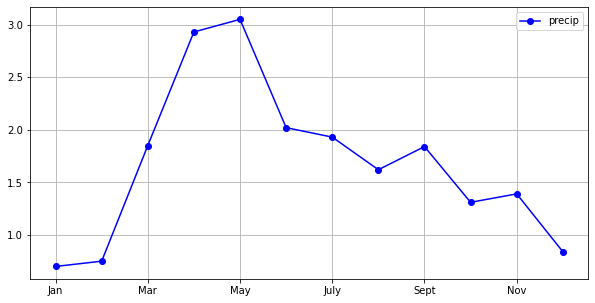

In [61]:
df.plot(y='precip', marker='o', color='b', figsize=(10,5), grid=True);

### b) bar plot of average precip by season

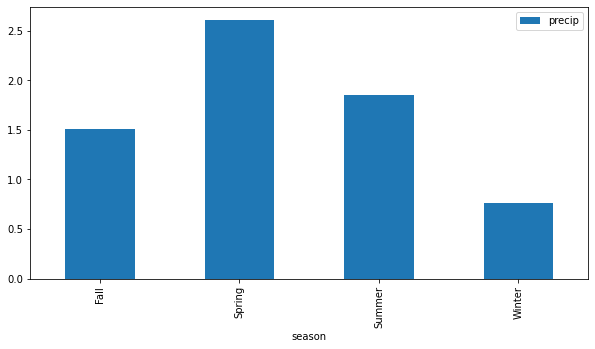

In [62]:
df2.plot(kind='bar', figsize=(10,5));

### c) boxplot of average precip by season

<AxesSubplot:>

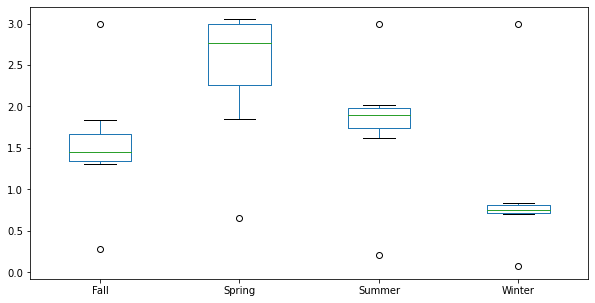

In [64]:
df.groupby('season')[['precip']].describe().T.boxplot(figsize=(10,5), grid=False)